# Модель для предсказания уровня зарплатных ожиданий сотрудников

## Импорты

In [1]:
import numpy as np
import pandas as pd

## Исходные данные

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
wdir = '/content/drive/My Drive/Courses/DataScience/DataScience/I_DIPLOMA/data'

In [ ]:
raw_data = pd.read_excel(f'{wdir}/raw_data.xlsx')

In [ ]:
raw_data.head(3)

,Unnamed: 0,entrydate,title,position,gender,city,age,salary,experience,last_job,updated,link
0,0,2020-04-08,"Резюме Менеджер по продажам мебели, дизайнер-к...",Менеджер по продажам,Женщина,Москва,31,70,8.0,ООО ИНТЕХ,2020-04-08,https://hh.ru/resume/840fd6300000a252640039ed1...
1,1,2020-04-08,Резюме Специалист по работе с клиентами,Клиентский менеджер,Мужчина,Липецк,40,90,15.0,МДК,2020-04-08,https://hh.ru/resume/66498670000716a4250039ed1...
2,2,2020-04-08,"Резюме Супервайзер торговых представителей, ст...",Супервайзер,Мужчина,Самара,34,50,7.0,Ютф-дистрибьютор,2020-04-08,https://hh.ru/resume/70e7817700035195b70039ed1...


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3178 non-null   int64         
 1   entrydate   3178 non-null   datetime64[ns]
 2   title       3178 non-null   object        
 3   position    3178 non-null   object        
 4   gender      3178 non-null   object        
 5   city        3178 non-null   object        
 6   age         3178 non-null   int64         
 7   salary      3178 non-null   int64         
 8   experience  2522 non-null   float64       
 9   last_job    3178 non-null   object        
 10  updated     3178 non-null   datetime64[ns]
 11  link        3178 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 298.1+ KB


In [ ]:
raw_data.columns

Index(['Unnamed: 0', 'entrydate', 'title', 'position', 'gender', 'city', 'age',
       'salary', 'experience', 'last_job', 'updated', 'link'],
      dtype='object')

## Предобработка данных

In [ ]:
def data_prep(df_input):
  """Обрабатывает исходные данные"""
  df_output = df_input.copy()
  df_output['experience'] = df_output['experience'].fillna(
                            df_output['experience'].mean())
  df_output['experience'] = df_output['experience'].astype(np.int)
  df_output.drop([
                  'Unnamed: 0',
                  'title',
                  'entrydate',
                  'last_job',
                  'updated',
                  'link'],
                 axis=1,
                 inplace=True)
  
  return df_output

In [ ]:
# Посмотрим на подготовленные данные
data = data_prep(raw_data)
data.head()

,position,gender,city,age,salary,experience
0,Менеджер по продажам,Женщина,Москва,31,70,8
1,Клиентский менеджер,Мужчина,Липецк,40,90,15
2,Супервайзер,Мужчина,Самара,34,50,7
3,Коммерческий директор,Мужчина,Краснодар,47,60,10
4,Менеджер по продажам,Мужчина,Москва,43,50,11


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   position    3178 non-null   object
 1   gender      3178 non-null   object
 2   city        3178 non-null   object
 3   age         3178 non-null   int64 
 4   salary      3178 non-null   int64 
 5   experience  3178 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 149.1+ KB


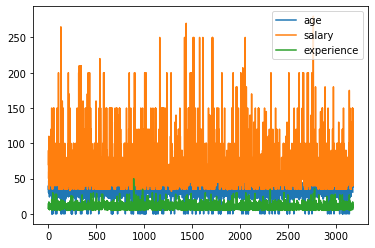

In [ ]:
# Посмотрим, есть ли в данных выбросы
data.plot();

In [ ]:
data[data['salary'] > 200]

,position,gender,city,age,salary,experience
130,Коммерческий директор,Мужчина,Москва,36,265,12
322,Менеджер по продажам,Мужчина,Москва,29,210,7
331,Менеджер по продажам,Мужчина,Москва,29,210,7
342,Менеджер по продажам,Мужчина,Москва,29,210,7
537,Региональный менеджер,Male,Moscow,35,220,10
1162,Менеджер по продажам,Мужчина,Москва,37,250,14
1421,Руководитель продаж,Мужчина,Москва,51,250,10
1429,Руководитель продаж,Мужчина,Москва,51,250,10
1438,Менеджер по продажам,Мужчина,Уфа,26,270,10
1511,Менеджер по продажам,Женщина,Москва,48,250,10


Пожалуй, все позиции кроме "Руководитель продаж" и "Коммерческий директор" с ожиданиями выше 200 тыс.руб - будут вносить "разлад" в наши данные. Удалим их

In [ ]:
 isx = data[
      (data['salary'] > 200) & 
      (data['position'] != 'Коммерческий директор') &
      (data['position'] != 'Руководитель продаж')].index

data = data.drop(data.index[isx])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3177
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   position    3169 non-null   object
 1   gender      3169 non-null   object
 2   city        3169 non-null   object
 3   age         3169 non-null   int64 
 4   salary      3169 non-null   int64 
 5   experience  3169 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 173.3+ KB


## Feature engineering

Обогатим наши данные численностью населения в городах проживания кандидатов, источник данных: https://zema.su/blog/polnyi-spisok-vsekh-gorodov-rossii-po-chislennosti-naseleniya

In [ ]:
cities = pd.read_excel(f'{wdir}/cities.xlsx')
cities = cities.drop('Н', axis=1)
cities.columns = ['city', 'population']
cities.head()

,city,population
0,Москва,11514330
1,Санкт-Петербург,4848742
2,Новосибирск,1473737
3,Екатеринбург,1350136
4,Нижний Новгород,1250615


In [ ]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   city        1109 non-null   object
 1   population  1109 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 17.5+ KB


In [ ]:
# Добавим данные по численности к основному датасету
data_merged = data.merge(cities, how='left', left_on='city', right_on='city')
data_merged.head()

,position,gender,city,age,salary,experience,population
0,Менеджер по продажам,Женщина,Москва,31,70,8,11514330.0
1,Клиентский менеджер,Мужчина,Липецк,40,90,15,508124.0
2,Супервайзер,Мужчина,Самара,34,50,7,1164896.0
3,Коммерческий директор,Мужчина,Краснодар,47,60,10,744933.0
4,Менеджер по продажам,Мужчина,Москва,43,50,11,11514330.0


In [ ]:
# Посмотрим % пропусков в столбце "population"
empty_values = data_merged['population'].isna().sum() / len (data_merged) * 100
print(f'{round(empty_values, 2)}%')

6.69%


In [ ]:
# Пропуски есть, но не критично много
# заполним их средними значениями
data_merged['population'] = data_merged['population'].fillna(
                            data_merged['population'].mean())
# И преобразуем float к int
data_merged['population'] = data_merged['population'].astype(np.int)
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   position    3169 non-null   object
 1   gender      3169 non-null   object
 2   city        3169 non-null   object
 3   age         3169 non-null   int64 
 4   salary      3169 non-null   int64 
 5   experience  3169 non-null   int64 
 6   population  3169 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 198.1+ KB


In [ ]:
data_merged.head()

,position,gender,city,age,salary,experience,population
0,Менеджер по продажам,Женщина,Москва,31,70,8,11514330
1,Клиентский менеджер,Мужчина,Липецк,40,90,15,508124
2,Супервайзер,Мужчина,Самара,34,50,7,1164896
3,Коммерческий директор,Мужчина,Краснодар,47,60,10,744933
4,Менеджер по продажам,Мужчина,Москва,43,50,11,11514330


In [ ]:
# Далее, преобразуем категориальные признаки в числовые
data_merged['gender_lbl'] = data_merged['gender'].apply(
                            lambda x: 1 if x == 'Мужчина' else 0
                            )
data_merged.head()

,position,gender,city,age,salary,experience,population,gender_lbl
0,Менеджер по продажам,Женщина,Москва,31,70,8,11514330,0
1,Клиентский менеджер,Мужчина,Липецк,40,90,15,508124,1
2,Супервайзер,Мужчина,Самара,34,50,7,1164896,1
3,Коммерческий директор,Мужчина,Краснодар,47,60,10,744933,1
4,Менеджер по продажам,Мужчина,Москва,43,50,11,11514330,1


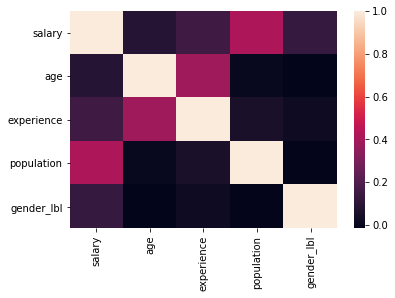

In [ ]:
# Посмотрим на зависимости между признаками

from seaborn import heatmap

heatmap(
    data_merged[['salary', 
                 'age', 
                 'experience', 
                 'population', 
                 'gender_lbl']
                ].corr());

Как видно, самая сильная зависимость уровня ожиданий - от численности населения города проживания (в крупных городах ожидания явно выше)

In [ ]:
# Добавим фиктивные переменные к датасету из наименований позиций
# при помощи метода "One-hot encoding"
data_dummy = pd.get_dummies(data_merged.drop(['city', 'gender'], axis=1))
data_dummy.head()

,age,salary,experience,population,gender_lbl,position_Администратор,position_Водитель,position_Кам,position_Кассир,position_Кладовщик,position_Клиентский менеджер,position_Коммерческий директор,position_Курьер,position_Менеджер по закупкам,position_Менеджер по продажам,position_Менеджер по развитию,position_Мерчендайзер,position_Оператор,position_Помощник менеджера,position_Продавец-консультант,position_Региональный менеджер,position_Руководитель продаж,position_Специалист,position_Супервайзер,position_Территориальный менеджер,position_Товаровед,position_Торговый представитель,position_Управляющий магазином
0,31,70,8,11514330,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40,90,15,508124,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,34,50,7,1164896,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,47,60,10,744933,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,43,50,11,11514330,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


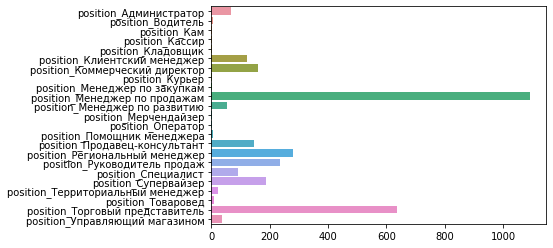

In [ ]:
# Посмотрим на частые позиции
import seaborn as sns
import matplotlib.pyplot as plt

db = data_dummy.drop(['age',	'salary',	'experience',	
                       'population',	'gender_lbl'], axis=1)

sns.barplot(x = db.sum(), 
            y = db.sum().index);

In [ ]:
# Как видно, данные по позициям очень неоднородны
# Случайным образом "перемешаем" и добавим частями
# уже имеющиеся данные в датасет

from sklearn.utils import shuffle
import random

for i in range(30000):
  data_shuffle = shuffle(data_dummy).head(10)
  data_dummy = data_dummy.append(data_shuffle)

len(data_dummy)

303169

In [ ]:
# Теперь выберем по 400 случайных строк по каждой позиции

balanced_data = pd.DataFrame()

for i in data_dummy.columns[5:]:
  data_filtred = data_dummy[data_dummy[i] == 1].head(400)
  balanced_data = balanced_data.append(data_filtred)
  balanced_data.index = range(len(balanced_data.index))

balanced_data.to_excel(f'{wdir}/balanced_data.xlsx')

In [3]:
# Загрузим подготовленные данные
balanced_data = pd.read_excel(f'{wdir}/balanced_data.xlsx')
balanced_data = balanced_data.drop('Unnamed: 0', axis=1)
balanced_data.head()

,age,salary,experience,population,gender_lbl,position_Администратор,position_Водитель,position_Кам,position_Кассир,position_Кладовщик,position_Клиентский менеджер,position_Коммерческий директор,position_Курьер,position_Менеджер по закупкам,position_Менеджер по продажам,position_Менеджер по развитию,position_Мерчендайзер,position_Оператор,position_Помощник менеджера,position_Продавец-консультант,position_Региональный менеджер,position_Руководитель продаж,position_Специалист,position_Супервайзер,position_Территориальный менеджер,position_Товаровед,position_Торговый представитель,position_Управляющий магазином
0,31,60,8,11514330,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,31,60,8,11514330,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,29,50,7,11514330,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,29,50,7,11514330,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,33,55,12,11514330,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
balanced_data.describe()

,age,salary,experience,population,gender_lbl,position_Администратор,position_Водитель,position_Кам,position_Кассир,position_Кладовщик,position_Клиентский менеджер,position_Коммерческий директор,position_Курьер,position_Менеджер по закупкам,position_Менеджер по продажам,position_Менеджер по развитию,position_Мерчендайзер,position_Оператор,position_Помощник менеджера,position_Продавец-консультант,position_Региональный менеджер,position_Руководитель продаж,position_Специалист,position_Супервайзер,position_Территориальный менеджер,position_Товаровед,position_Торговый представитель,position_Управляющий магазином
count,7312.000000,7312.000000,7312.000000,7.312000e+03,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000,7312.000000
mean,33.188868,63.462391,10.638950,5.398106e+06,0.673550,0.054705,0.054705,0.019694,0.019283,0.015591,0.054705,0.054705,0.013676,0.027216,0.054705,0.054705,0.054705,0.007112,0.022155,0.054705,0.054705,0.054705,0.054705,0.054705,0.054705,0.054705,0.054705,0.054705
std,11.316139,35.010079,4.609032,4.863162e+06,0.468946,0.227418,0.227418,0.138955,0.137529,0.123894,0.227418,0.227418,0.116151,0.162722,0.227418,0.227418,0.227418,0.084036,0.147199,0.227418,0.227418,0.227418,0.227418,0.227418,0.227418,0.227418,0.227418,0.227418
min,0.000000,32.000000,5.000000,1.184800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,40.000000,7.000000,8.899890e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,50.000000,10.000000,4.394741e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40.000000,70.000000,12.000000,1.151433e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,72.000000,280.000000,50.000000,1.151433e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7312 entries, 0 to 7311
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   age                                7312 non-null   int64
 1   salary                             7312 non-null   int64
 2   experience                         7312 non-null   int64
 3   population                         7312 non-null   int64
 4   gender_lbl                         7312 non-null   int64
 5   position_Администратор             7312 non-null   int64
 6   position_Водитель                  7312 non-null   int64
 7   position_Кам                       7312 non-null   int64
 8   position_Кассир                    7312 non-null   int64
 9   position_Кладовщик                 7312 non-null   int64
 10  position_Клиентский менеджер       7312 non-null   int64
 11  position_Коммерческий директор     7312 non-null   int64
 12  position_Курьер     

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


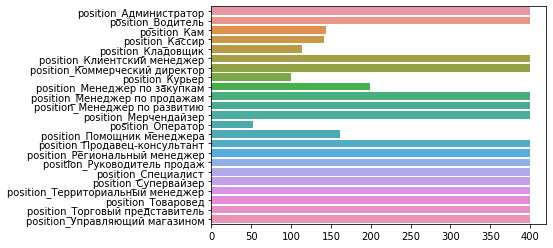

In [6]:
# Снова посмотрим на позиции
import seaborn as sns
import matplotlib.pyplot as plt

db = balanced_data.drop(['age',	'salary',	'experience',	
                       'population',	'gender_lbl'], axis=1)

sns.barplot(x = db.sum(), 
            y = db.sum().index);

Совсем другое дело...

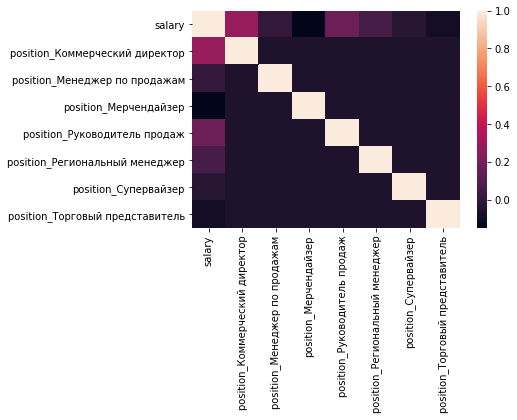

In [ ]:
import seaborn as sns
from seaborn import heatmap

heatmap(balanced_data[['salary',
                   'position_Коммерческий директор',
                   'position_Менеджер по продажам',
                   'position_Мерчендайзер',
                   'position_Руководитель продаж',
                    'position_Региональный менеджер',
                   'position_Супервайзер',
                   'position_Торговый представитель'
                    ]].corr());

Также на примере мы видим явную зависимость между статусными позициями, такими как "Коммерческий директор" и "Руководитель продаж" и уровнем их ожиданий по доходу

## Baseline - тренируем наивную модель

"Always start with a stupid model, no exceptions..."

In [7]:
# Фиксируем гиперпараметры
random_seed = 42
splits = 5

In [8]:
from sklearn.model_selection import train_test_split


def data_split(data):
  """Hold-out разбиение датасета на выборки"""
  X = data.drop(['salary'], axis=1)
  y = data['salary'].values

  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, shuffle=True,
      random_state=random_seed)
  
  return X_train, X_test, y_train, y_test


In [ ]:
# Посмотрим на структуру разбиения
from prettytable import PrettyTable
x = PrettyTable()

X_train, X_test, y_train, y_test = data_split(balanced_data)

x.field_names = ["Тип выборки", "Размерность"]
x.add_row(["Исходная выборка", balanced_data.shape])
x.add_row(["X_train", X_train.shape])
x.add_row(["X_test", X_test.shape])
x.add_row(["y_train", y_train.shape])
x.add_row(["y_test", y_test.shape])
print(x)

+------------------+-------------+
|   Тип выборки    | Размерность |
+------------------+-------------+
| Исходная выборка |  (7312, 28) |
|     X_train      |  (5849, 27) |
|      X_test      |  (1463, 27) |
|     y_train      |   (5849,)   |
|      y_test      |   (1463,)   |
+------------------+-------------+


Наша задача предсказания ожиданий кандидата по уровню оплаты труда сводится к классической задаче регрессии (с учителем). Для baseline часто используют модель линейной регрессии, т.к. она традиционно неплохо справляется с bias и variance

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae


def train_linreg(data):
  """Обучает модель регрессии"""

  X_train, X_test, y_train, y_test = data_split(balanced_data)
 
  # Описание модели
  model = LinearRegression()
  
  # Обучение модели
  model.fit(X_train, y_train)
  
  # Предсказание на основании обученной модели
  y_pred = model.predict(X_test)
  
  # Метрика качества mse
  error = mae(y_test, y_pred)
  
  print('mae:', error, 'mape:', error / data['salary'].mean())

Более всего целевая переменная зависит от параметров:
- численность населения (population)
- позиция (position)

Посмотрим на ошибку, которую выдаст наивная модель по каждому из параметров в отдельности

In [ ]:
# Какую ошибку выдаст наивная модель по одной позиции
train_linreg(
    balanced_data[balanced_data['position_Менеджер по продажам'] == 1]
)

mae: 14.076955348208232 mape: 0.2187136197041481


In [ ]:
# Какую ошибку выдаст наивная модель по одному городу
# (численность города Москва)
train_linreg(
    balanced_data[balanced_data['population'] == 11514330]
)

mae: 14.076955348208232 mape: 0.18351153210977622


In [ ]:
# Какую ошибку выдаст наивная модель по всей выборке
train_linreg(balanced_data)

mae: 14.076955348208232 mape: 0.22181571190680613


Метрики `mae` и `mape` выберем в связи с их высокой интуитивностью, ведь все понимают, что ошибка модели в 14 тыс.р при средней ожидаемой зарплате в 65 тыс.р. - это достаточно много.

## Подготовка и построение модели

### Разбиение выборки и кросс-валидация

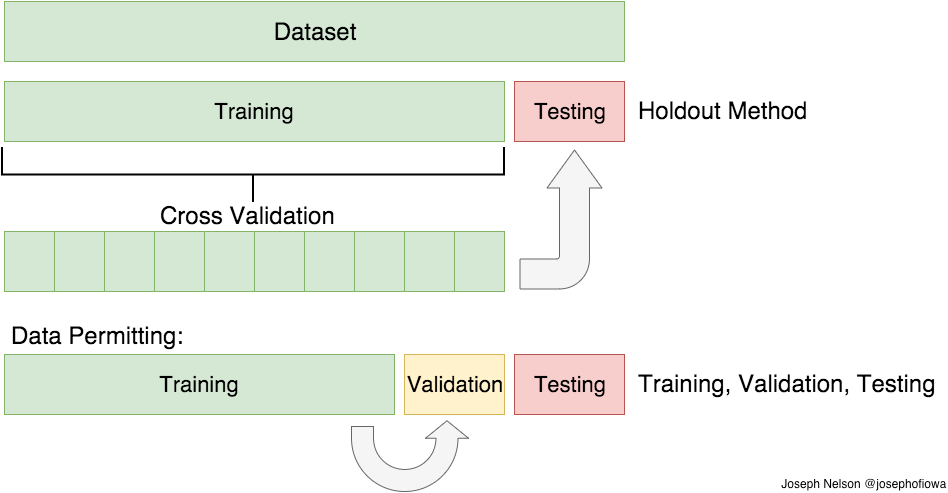

Обучение модели на одной разбивке данных, особенно при небольшом их количестве, как в нашем случае - является методологической ошибкой. Поэтому, сделаем разбиение данных на фолды и кросс-валидацию

In [ ]:
import sklearn

sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
from sklearn.model_selection import cross_val_score


def cross_val(data, model):
  """Скоринг кросс-валидации данных"""
  X = data.drop(['salary'], axis=1)
  y = data['salary'].values

  cv_score = cross_val_score(model, 
                              X, y, 
                              cv=splits,
                              scoring='neg_mean_absolute_error',
                              n_jobs=-1)
  return abs(cv_score.mean())


In [ ]:
# Начнем с модели линейной регрессии
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
cross_val(balanced_data, model_lr)

23.776074021161456

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt


def cross_val_fig(data, model):
  """Визуализация прогноза кросс-валидации данных"""
  X = data.drop(['salary'], axis=1)
  y = data['salary'].values

  predicted = cross_val_predict(model, 
                                X, y, 
                                cv=splits)
  
  error = mae(y, predicted)
  # cross_val_predict возвращает массив размерности `y`, где каждое значение
  # где каждый прогноз получен методом кросс-валидации:
  fig, ax = plt.subplots()
  ax.scatter(y, predicted, edgecolors=(0, 0, 0))
  ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=1)
  ax.set_xlabel('Measured')
  ax.set_ylabel('Predicted')
  
  print('MAE:', error, 'MAPE:', error / data['salary'].mean())
  plt.show()


MAE: 23.777228096119707 MAPE: 0.37466644219928


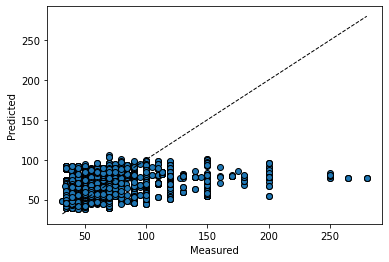

In [ ]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
cross_val_fig(balanced_data, model_lr)

На графике видно, что модель недообучается, то есть, аппроксимирующей способности модели линейной регрессии недостаточно, чтобы описать зависимости в данных. Требуется усложнение модели

### Сравнительное тестирование различных моделей с базовыми параметрами

In [ ]:
!pip install catboost

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

from prettytable import PrettyTable
x = PrettyTable()


def review_models(data):
  """Обзор метрики MAE / MAPE некоторых моделей на
  стандартных настройках"""

  mean_salary = data['salary'].mean()

  X_train, X_test, y_train, y_test = data_split(data)
  
  # CatBoost
  model_catboost = CatBoostRegressor(random_state=random_seed)
  model_catboost.fit(X_train, y_train, silent=True)
  y_catboost = model_catboost.predict(X_test)
  mae_catboost = mae(y_test, y_catboost)

  # Lightgbm
  model_lightgbm = LGBMRegressor(random_state=random_seed)
  model_lightgbm.fit(X_train, y_train)
  y_lightgbm = model_lightgbm.predict(X_test)
  mae_lightgbm = mae(y_test, y_lightgbm)

  # XGBRegressor
  model_xgb = XGBRegressor(random_state=random_seed)
  model_xgb.fit(X_train, y_train)
  y_xgb = model_xgb.predict(X_test)
  mae_xgb = mae(y_test, y_xgb)

  # RandomForest
  model_rf = RandomForestRegressor(random_state=random_seed)
  model_rf.fit(X_train, y_train)
  y_rf = model_rf.predict(X_test)
  mae_rf = mae(y_test, y_rf)

  #ExtraTrees
  model_etr = ExtraTreesRegressor(random_state=random_seed)
  model_etr.fit(X_train, y_train)
  y_etr = model_etr.predict(X_test)
  mae_etr = mae(y_test, y_etr)
  
  # Таблица итогового сравнения
  x.field_names = ["Regressor", "MAE", "MAPE"]
  x.add_row(["CatBoost", mae_catboost, mae_catboost / mean_salary])
  x.add_row(["LGBM", mae_lightgbm, mae_lightgbm / mean_salary])
  x.add_row(["RandomForest", mae_rf, mae_rf / mean_salary])
  x.add_row(["XGBoost", mae_xgb, mae_xgb / mean_salary])
  x.add_row(["ExtraTrees", mae_etr, mae_etr / mean_salary])

  print(x.get_string(sortby="MAPE"))


In [ ]:
# Обзор результатов
import warnings
warnings.filterwarnings('ignore')

review_models(balanced_data)

[17:51:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
+--------------+--------------------+---------------------+
|  Regressor   |        MAE         |         MAPE        |
+--------------+--------------------+---------------------+
|  ExtraTrees  | 3.0873140236956025 | 0.04864793139612196 |
| RandomForest |  4.05694934637645  | 0.06392682829322792 |
|   CatBoost   | 6.889728563697291  |  0.1085639620499111 |
|     LGBM     | 7.790427504977169  |  0.1227566032803269 |
|   XGBoost    | 11.865602111294917 |  0.1869706136316467 |
+--------------+--------------------+---------------------+


Модель ExtraTreesRegressor из библиотеки sklearn показывает лучший стартовый  результат. Данный алгоритм использует метаоценщик и усреднение решений деревьев, что позволяет одновременно снизить риск переобучения модели, но при этом усложнить решение

### Обучение модели ExtraTreesRegressor с оптимизацией гиперпараметров

#### Оптимизация гиперпараметров

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV


def train_extra_trees(data):
  """Обучает модель регрессии ExtraTrees"""
  
  mean_salary = data['salary'].mean()
  X = data.drop(['salary'], axis=1)
  y = data['salary'].values
  X_train, X_test, y_train, y_test = data_split(data)
  
  # Описание модели
  model = ExtraTreesRegressor(random_state=random_seed)
  
  # Оптимизатор гиперпараметров
  params = {
      # 'criterion': ['mae', 'mse'],
      'n_estimators': [20, 30, 50, 100, 250],
      # 'min_samples_split': [1, 2, 4, 6, 8],
      # 'min_samples_leaf': [1, 2, 4, 6, 8],
      # 'min_weight_fraction_leaf': [0.0, 0.1],
      # 'min_impurity_decrease': [0.0, 0.1],
      # 'min_impurity_split': [0.0, 0.1],
      # 'bootstrap': ['True', 'False'],
      # 'ccp_alpha': [0.0, 0.1]
      }

  clf = GridSearchCV(model, params)
  
  search = clf.fit(X, y)
  best_params = search.best_params_
  print('Лучшие параметры:', best_params)
  print('Обучение модели на лучших параметрах...')

  # Обучение модели с оптимальными гиперпараметрами
  best_model = ExtraTreesRegressor(
      random_state=random_seed,
      criterion='mae',
      n_estimators=best_params['n_estimators'],
      # min_samples_split=best_params['min_samples_split'],
      # min_samples_leaf=best_params['min_samples_leaf'],
      # min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
      # min_impurity_decrease=best_params['min_impurity_decrease'],
      # min_impurity_split=best_params['min_impurity_split'],
      # bootstrap=best_params['bootstrap'],
      # ccp_alpha=best_params['ccp_alpha'],
      n_jobs=-1)
  
  best_model.fit(X_train, y_train)
  
  # Предсказание на основании обученной модели
  y_pred = best_model.predict(X_test)

  # Метрика качества mse
  error = mae(y_test, y_pred)
  print('MAE:', error, 'MAPE:', error / mean_salary)
  
  return best_model


In [ ]:
train_extra_trees(balanced_data)

Лучшие параметры: {'n_estimators': 50}
Обучение модели на лучших параметрах...
MAE: 2.9380997949419 MAPE: 0.04629670845345344


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=50, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [ ]:
best_model = train_extra_trees(balanced_data)

Лучшие параметры: {'n_estimators': 50}
Обучение модели на лучших параметрах...
MAE: 2.9380997949419 MAPE: 0.04629670845345344


MAE: 18.025031455142233


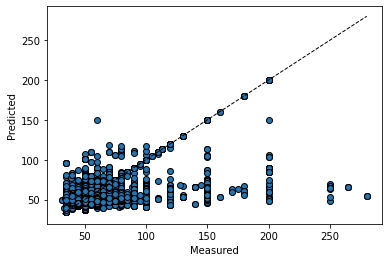

In [ ]:
cross_val_fig(balanced_data, best_model)

Аппроксимирующая способность модели явно выше, чем у модели линейной регрессии. Часть ожиданий свыше 100 тыс.р. стала определяться явно лучше. Однако, MAE на кросс-валидации значительно выше, чем при обучении модели с оптимизацией гиперпараметров. Модель переобучилась

### Обучение модели RandomForestRegressor с оптимизацией гиперпараметров

Для сравнения с ExtraTreesRegression

#### Оптимизация гиперпараметров

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV


def train_random_forest(data):
  """Обучает модель регрессии ExtraTrees"""
  
  mean_salary = data['salary'].mean()
  X = data.drop(['salary'], axis=1)
  y = data['salary'].values
  X_train, X_test, y_train, y_test = data_split(data)
  
  # Описание модели
  model = RandomForestRegressor(random_state=random_seed)
  
  # Оптимизатор гиперпараметров
  params = {
      # 'criterion': ['mae', 'mse'],
      'n_estimators': [20, 30, 50, 100, 250],
      # 'min_samples_split': [1, 2, 4, 6, 8],
      # 'min_samples_leaf': [1, 2, 4, 6, 8],
      # 'min_weight_fraction_leaf': [0.0, 0.1],
      # 'min_impurity_decrease': [0.0, 0.1],
      # 'min_impurity_split': [0.0, 0.1],
      # 'bootstrap': ['True', 'False'],
      # 'ccp_alpha': [0.0, 0.1]
      }

  clf = GridSearchCV(model, params)
  
  search = clf.fit(X, y)
  best_params = search.best_params_
  print('Лучшие параметры:', best_params)
  print('Обучение модели на лучших параметрах...')

  # Обучение модели с оптимальными гиперпараметрами
  best_model = RandomForestRegressor(
      random_state=random_seed,
      criterion='mae',
      n_estimators=best_params['n_estimators'],
      # min_samples_split=best_params['min_samples_split'],
      # min_samples_leaf=best_params['min_samples_leaf'],
      # min_weight_fraction_leaf=best_params['min_weight_fraction_leaf'],
      # min_impurity_decrease=best_params['min_impurity_decrease'],
      # min_impurity_split=best_params['min_impurity_split'],
      # bootstrap=best_params['bootstrap'],
      # ccp_alpha=best_params['ccp_alpha'],
      n_jobs=-1)
  
  best_model.fit(X_train, y_train)
  
  # Предсказание на основании обученной модели
  y_pred = best_model.predict(X_test)

  # Метрика качества mse
  error = mae(y_test, y_pred)
  print('MAE:', error, 'MAPE:', error / mean_salary)
  
  return best_model


In [ ]:
best_model_rf = train_random_forest(balanced_data)

Лучшие параметры: {'n_estimators': 100}
Обучение модели на лучших параметрах...
MAE: 4.263971291866029 MAPE: 0.06718894848066943


MAE: 19.001921498905908 MAPE: 0.29942019709635226


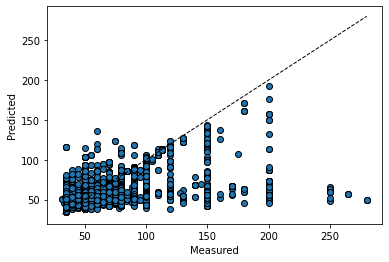

In [ ]:
cross_val_fig(balanced_data, best_model_rf)

Variance и Bias у модели RandomForest видимо хуже, чем у ExtraTreesRegressor


## Дорожная карта доработки

1) Повышение робастности модели за счет обогащения нескоррелированными данными, такими как:

- ключевые навыки
- тип предыдущего работодателя
- наличие водительских прав
- готовность к релокации и др.

2) Расширение тестируемых базовых алгоритмов

3) Использование NLP-алгоритмов для анализа резюме анкет

## Сериализация модели

In [ ]:
import pickle


def serial_model(data):
  """Сохраняет модель регрессии в бинарный файл"""

  model = train_extra_trees(data)

  # Сериализация модели
  with open(f'{wdir}/jsp_model.pkl', 'wb') as output:
    pickle.dump(model, output)


In [ ]:
serial_model(balanced_data)

In [ ]:
!pip freeze > requirements.txt

In [ ]:
!ls

drive  jsp_model.pkl  requirements.txt	sample_data
